## 1. Module import

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

## 2. Data

In [27]:
df = pd.read_csv('../data/tfidf_matrix.csv',encoding='latin1')
#df = pd.read_csv('../data/emails.csv')
#df = pd.read_csv('../data/preprocessing.csv')
df.head()



,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02073162414,02085076972,...,ãµ,ãµd,ãµday,ãµllspeak,ãµm,ãµr,ãµscool,ãµt,ãµv,prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Split data into 2 parts to train and test

In [28]:
x = df.iloc[: , 1:len(df.columns)-1]
y = df.iloc[: , -1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## 3.Model

In [29]:
from sklearn.naive_bayes import MultinomialNB

#model
NB_classifier = MultinomialNB()

#train the model
NB_classifier.fit(x_train, y_train)

# make prediction
y_pred = NB_classifier.predict(x_test)

## 4. Result

Precision :  1.0
Recall :  0.6934306569343066
Accuracy Score :  0.9593023255813954
F1 Score :  0.8189655172413793

 [[895   0]
 [ 42  95]]



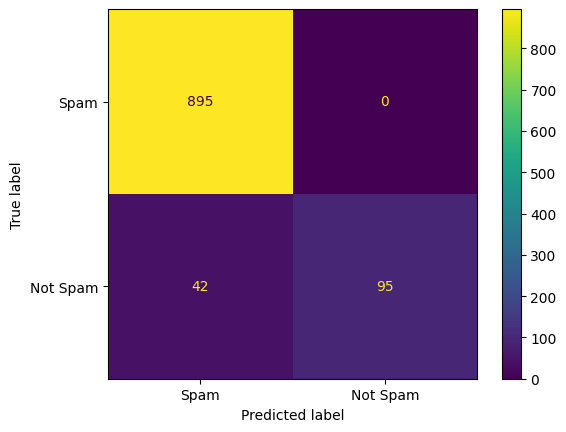

In [30]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

perform(y_pred)
